<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/External_Access_to_Azure_Quantum_mkbahk_20240911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
!python3 -m pip install qiskit[visualization]==1.0.2
!python3 -m pip install azure-quantum[qiskit]==2.1.1

In [84]:
# Creating a new Workspace object from a connection string
from azure.quantum import Workspace

connection_string = ""
workspace = Workspace.from_connection_string(connection_string)

#print(workspace.get_targets())

In [77]:
from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider(workspace=workspace)
print(provider.backends())

[<IonQSimulatorBackend('ionq.simulator')>, <IonQAriaBackend('ionq.qpu.aria-1')>, <IonQAriaBackend('ionq.qpu.aria-2')>, <RigettiSimulatorBackend('rigetti.sim.qvm')>, <RigettiQPUBackend('rigetti.qpu.ankaa-2')>, <MicrosoftResourceEstimationBackend('microsoft.estimator')>]


In [78]:
backend = provider.get_backend("ionq.simulator")

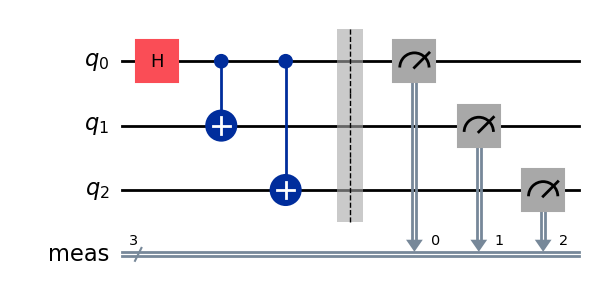

In [79]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.measure_all()
circuit.draw("mpl")

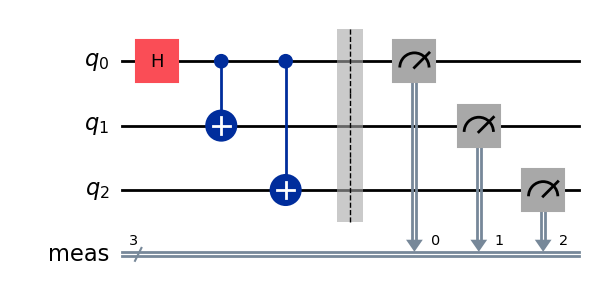

In [80]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(circuit, backend)
trans_qc.draw("mpl")

In [81]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
###while


print("Job status is", job.status() )

# 결과 출력
counts = job.result().get_counts()
print(counts)

Job ID is acd0d9de-6ff5-11ef-b375-0242ac1c000c 

Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.DONE
{'000': 510, '111': 514}


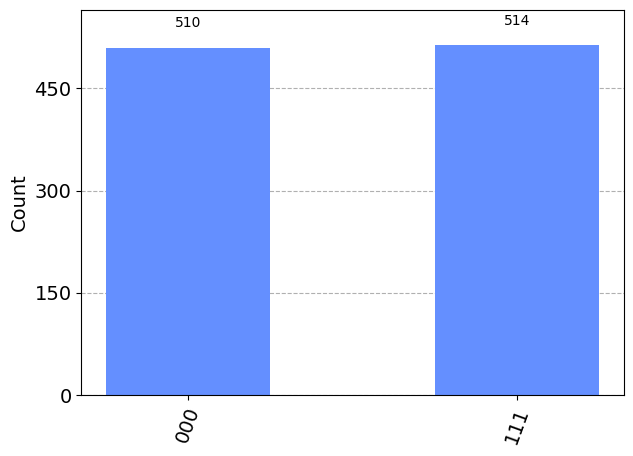

In [82]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)